# main function to compute entropy of 1D samples
@author: Ofer Shir, oshir@alumni.Princeton.EDU

## Naive attempt: $p\leadsto \{ S,\sigma \}$ (assuming they are equivalent)

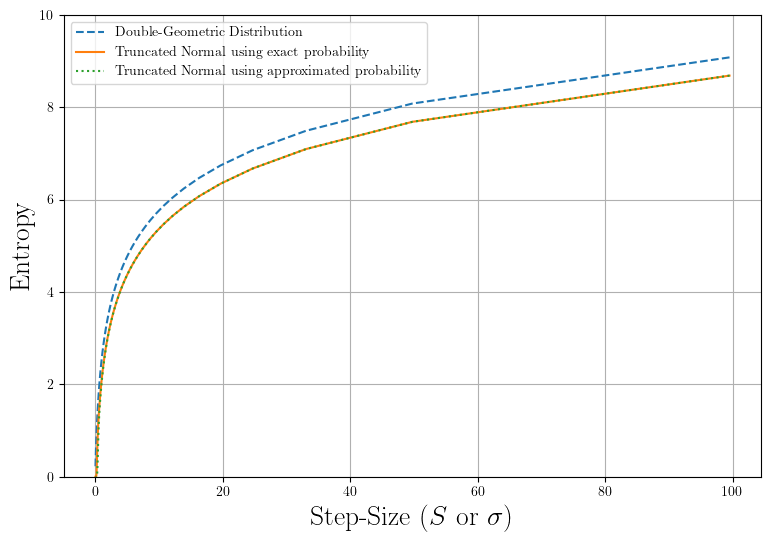

In [ ]:
import numpy as np
from scipy.stats import entropy,geom,norm
import seaborn as sns
import matplotlib.pyplot as plt
import maxEntropy as ME

if __name__ == '__main__' :
    # Range of p values
    p_values = np.linspace(0.01, 0.99, 100)
    # Compute entropy for each p
    DGentropy_values = [ME.entropy_dgeometric(p) for p in p_values]
    S_values = 2.0*(1.0-p_values)/(p_values*(2-p_values))
    # Range of sigma values
    sigma_values = S_values #np.sqrt(0.5* np.sqrt(np.pi) * S_values) #np.linspace(0.1, 100, 500)  # From narrow to wide distributions
    # Compute entropy for each sigma
    TGentropy_values_exact = [ME.entropy_TGauss(sigma) for sigma in sigma_values]
    TGentropy_values_approx = [ME.entropy_TGauss(sigma,exact=False) for sigma in sigma_values]
    #
    plt.figure(figsize=(9, 6))
    plt.plot(S_values, DGentropy_values, label='Double-Geometric Distribution',linestyle='--')
    plt.plot(sigma_values, TGentropy_values_exact, label='Truncated Normal using exact probability',linestyle='-')
    plt.plot(sigma_values, TGentropy_values_approx, label='Truncated Normal using approximated probability',linestyle=':')
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif')
    plt.xlabel(r"Step-Size ($S$ or $\sigma$)",fontsize=20) # plt.xlabel(r"$\sigma$",fontsize=20)
    plt.ylabel(r"Entropy",fontsize=20)
    # plt.title('Entropy of Truncated Gaussian Distribution vs. $\\sigma$')
    plt.grid(True)
    plt.ylim(0,10)
    plt.legend()
    plt.show()

## The naive (wrong?) way: setting $\sigma$ and obtaining $S \leadsto p$

<>:104: SyntaxWarning: invalid escape sequence '\e'
<>:105: SyntaxWarning: invalid escape sequence '\s'
<>:109: SyntaxWarning: invalid escape sequence '\s'
<>:110: SyntaxWarning: invalid escape sequence '\e'
<>:104: SyntaxWarning: invalid escape sequence '\e'
<>:105: SyntaxWarning: invalid escape sequence '\s'
<>:109: SyntaxWarning: invalid escape sequence '\s'
<>:110: SyntaxWarning: invalid escape sequence '\e'
/var/folders/10/x5tw1nns3y38q9y0zmfjl8_c0000gn/T/ipykernel_42352/1911021895.py:104: SyntaxWarning: invalid escape sequence '\e'
  plt.scatter(sigma_values, DGentropy_values_from_S, label='Double-Geometric Distribution controlled by expected $\ell_{1}$-norm',marker='+')
/var/folders/10/x5tw1nns3y38q9y0zmfjl8_c0000gn/T/ipykernel_42352/1911021895.py:105: SyntaxWarning: invalid escape sequence '\s'
  plt.scatter(sigma_values, DGentropy_values_from_sigma, label='Double-Geometric Distribution controlled by $\sigma$',marker='+')
/var/folders/10/x5tw1nns3y38q9y0zmfjl8_c0000gn/T/ipykern

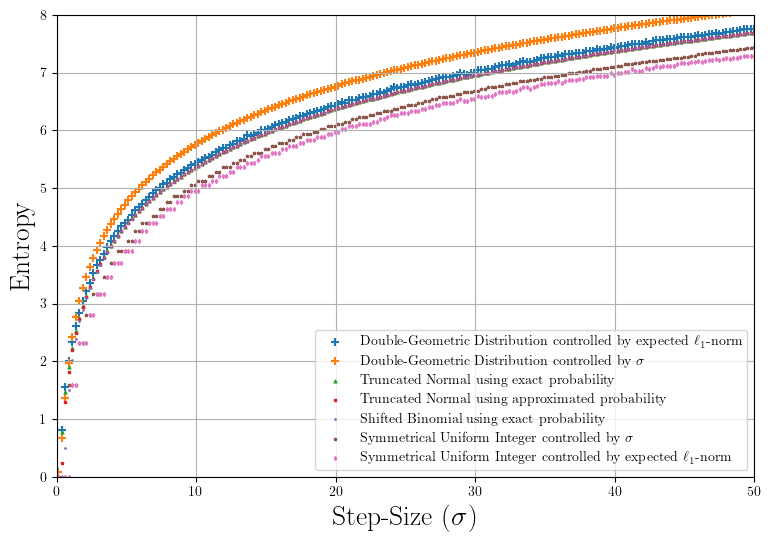

In [27]:
import numpy as np
from scipy.stats import entropy,geom,norm
import seaborn as sns
import matplotlib.pyplot as plt
import maxEntropy as ME
import binomialEntropy as BE
from scipy.optimize import fsolve

# Function that represents the quartic equation
def quartic_equation(p, sigma):
    return sigma**2 * p**4 + (2 - 4*sigma**2) * p**3 + (4 * sigma**2 - 6) * p**2 + 8 * p - 4

# Function to solve for p based on sigma
def solve_for_p(sigma):
    # Use fsolve to find the root of the quartic equation, starting with an initial guess for p
    initial_guess = 0.5  # You can adjust this guess
    p_solution = fsolve(quartic_equation, initial_guess, args=(sigma))
    return p_solution[0]

def expected_l1_norm_rounded_monte_carlo(mu=0, sigma=1, n=1, num_samples=10000) :
    # l1_norms = []
    # for _ in range(num_samples) :
    #     samples = np.random.normal(mean, std, n).round().astype(int)
    #     l1_norms.append(np.sum(np.abs(samples)))
    #     return np.mean(l1_norms)
    random_variables = np.random.normal(mu, sigma, (num_samples, n))
    rounded_variables = np.round(random_variables)
    l1_norms = np.sum(np.abs(rounded_variables), axis=1)
    return np.mean(l1_norms)
    #
def shifted_binomial_random(sigma, p=0.5, size=1):
    # Calculate n from sigma (since n = 4 * sigma^2)
    n = int(4 * sigma**2)
    
    # Generate binomial random variables
    binomial_samples = np.random.binomial(n, p, size)
    
    # Shift the samples by subtracting n/2
    shifted_samples = binomial_samples - (n // 2)
    
    return shifted_samples
#
def symmetrical_uniform_randint_from_sigma(sigma, size=1):
    # Calculate n from sigma (since n = 4 * sigma^2)
    N = int((-1 + np.sqrt(1 + 12 * sigma**2)) / 2)
    
    # Generate a symmetric uniform random integer vector with given
    random_vector = np.random.randint(-N, N + 1, size=size)
    
    return random_vector
#
def entropy_sym_randint_from_sigma(sigma) :
    N = int((-1 + np.sqrt(1 + 12 * sigma**2)) / 2)
    return np.log2(2 * N + 1)
#
def entropy_sym_randint_from_l1norm(S) :
    N = int((2 * S - 1 + np.sqrt(1 + 4 * S**2)) / 2)
    return np.log2(2 * N + 1)
#
if __name__ == '__main__' :
    debug_l1_MC = False
    sigma_values = np.linspace(0.1, 50, 200)  # From narrow to wide distributions
    S_values = [expected_l1_norm_rounded_monte_carlo(mu=0, sigma=s) for s in sigma_values]
    N1 = [int((-1 + np.sqrt(1 + 12 * sigma**2)) / 2) for sigma in sigma_values]
    N2 = [int((2 * S - 1 + np.sqrt(1 + 4 * S**2)) / 2) for S in S_values]
    if debug_l1_MC :
        plt.figure()
        #plt.scatter(sigma_values,S_values)
        plt.plot(sigma_values, N1, label='N from sigma', color='blue')
        plt.plot(sigma_values, N2, label='N from expected L1-norm', color='red', linestyle='--')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Range of p values - extracted from S_values
    p_values_from_S = [1.0 - ( sigma / (1.0+np.sqrt(1+(sigma**2))) ) for sigma in S_values]
    # Range of p values - extracted from sigma_values
    p_values_from_sigma = [solve_for_p(sigma) for sigma in sigma_values]
    debug_p_values = False
    if debug_p_values :
        plt.figure()
        plt.plot(sigma_values, p_values_from_S, label='p from S', color='blue')
        plt.plot(sigma_values, p_values_from_sigma, label='p from sigma', color='red', linestyle='--')
        plt.legend()
        plt.grid(True)
        plt.show()

    #Symmetrical Uniform Integer 
    SUentropy_values1 = [entropy_sym_randint_from_sigma(sigma) for sigma in sigma_values]
    SUentropy_values2 = [entropy_sym_randint_from_l1norm(S) for S in S_values]

    # Compute DG entropy for each p
    DGentropy_values_from_S = [ME.entropy_dgeometric(p) for p in p_values_from_S]
    DGentropy_values_from_sigma = [ME.entropy_dgeometric(p) for p in p_values_from_sigma]

    # Compute TN entropy for each sigma
    TGentropy_values_exact = [ME.entropy_TGauss(sigma) for sigma in sigma_values]
    TGentropy_values_approx = [ME.entropy_TGauss(sigma,exact=False) for sigma in sigma_values]
    #
    #Compute Shifted Binomial entropy per sigma
    SBentropy_values_exact = [BE.shifted_binomial_entropy_theoretical(sigma) for sigma in sigma_values]
    #
    plt.figure(figsize=(9, 6))
    plt.scatter(sigma_values, DGentropy_values_from_S, label='Double-Geometric Distribution controlled by expected $\ell_{1}$-norm',marker='+')
    plt.scatter(sigma_values, DGentropy_values_from_sigma, label='Double-Geometric Distribution controlled by $\sigma$',marker='+')
    plt.scatter(sigma_values, TGentropy_values_exact, label='Truncated Normal using exact probability',marker='^',s=4)
    plt.scatter(sigma_values, TGentropy_values_approx, label='Truncated Normal using approximated probability',marker='s',s=4)
    plt.scatter(sigma_values, SBentropy_values_exact, label='Shifted Binomial using exact probability',marker='o',s=1)
    plt.scatter(sigma_values, SUentropy_values1, label='Symmetrical Uniform Integer controlled by $\sigma$',marker='*',s=4)
    plt.scatter(sigma_values, SUentropy_values2, label='Symmetrical Uniform Integer controlled by expected $\ell_{1}$-norm',marker='d',s=4)
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif')
    plt.xlabel(r"Step-Size ($\sigma$)",fontsize=20) # plt.xlabel(r"$\sigma$",fontsize=20)
    plt.ylabel(r"Entropy",fontsize=20)
    # plt.title('Entropy of Truncated Gaussian Distribution vs. $\\sigma$')
    plt.grid(True)
    plt.ylim(0,8)
    plt.xlim(0,50)
    plt.legend()
    plt.show()

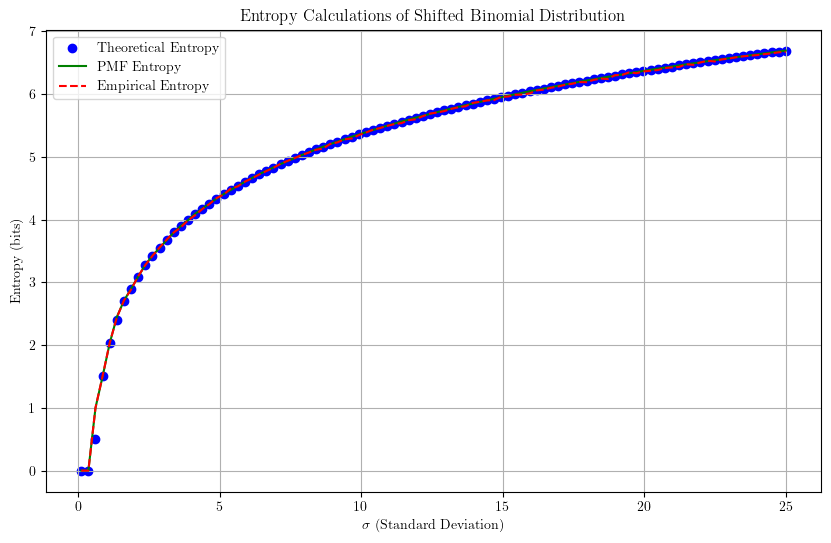

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.special import comb
import math

# Exact entropy
def shifted_binomial_entropy_theoretical (sigma) :
    n = int(4 * sigma**2)
    if n > 1000 :
        variance = n/4 #normal distribution approximation for large n
        entropy = 0.5 * math.log2(2*math.pi * math.e * variance)
    else :
        entropy = 0.0
        for k in range(-n//2, n//2 +1):
            try :
                probability = comb(n, k + n//2) * (0.5**n)
                if probability > 0 :
                    entropy -= probability * math.log2(probability)
            except ValueError :
                print('Edge case: comb became invalid!')
                pass
        # print(f"(n={n}) entropy={entropy}")
    return entropy

# Function to calculate the theoretical entropy of the shifted binomial distribution
def shifted_binomial_entropy_PMF(sigma, p=0.5):
    # Calculate n from sigma (since n = 4 * sigma^2)
    n = int(4 * sigma**2)
    
    # Generate the PMF for the binomial distribution (for X)
    k_values = np.arange(0, n+1)
    pmf_values = binom.pmf(k_values, n, p)
    
    # Shift the values of k by subtracting n/2
    # shifted_k_values = k_values - (n // 2)
    
    # Calculate the entropy of the shifted binomial distribution
    entropy = -np.sum(pmf_values * np.log2(pmf_values + 1e-10))  # Avoid log(0)
    
    return entropy

# Function to calculate the empirical entropy of the shifted binomial distribution
def shifted_binomial_entropy_empirical(sigma, p=0.5, num_samples=10000):
    # Calculate n from sigma (since n = 4 * sigma^2)
    n = int(4 * sigma**2)
    
    # Generate num_samples binomial random variables
    binomial_samples = np.random.binomial(n, p, num_samples)
    
    # Shift the samples by subtracting n/2
    shifted_samples = binomial_samples - (n // 2)
    
    # Estimate the PMF (probability distribution) from the samples
    unique_values, counts = np.unique(shifted_samples, return_counts=True)
    probabilities = counts / num_samples
    
    # Calculate the empirical entropy
    empirical_entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Avoid log(0)
    
    return empirical_entropy

# Range of sigma values to evaluate
sigma_range = np.linspace(0.1, 25, 100)

# Compute the theoretical and empirical entropy for each sigma
theoretical_entropy_values = [shifted_binomial_entropy_theoretical(sigma) for sigma in sigma_range]
pmf_entropy_values = [shifted_binomial_entropy_PMF(sigma) for sigma in sigma_range]
empirical_entropy_values = [shifted_binomial_entropy_empirical(sigma) for sigma in sigma_range]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(sigma_range, theoretical_entropy_values, label='Theoretical Entropy', c='blue')
plt.plot(sigma_range, pmf_entropy_values, label='PMF Entropy', color='green')
plt.plot(sigma_range, empirical_entropy_values, label='Empirical Entropy', color='red', linestyle='--')
plt.title('Entropy Calculations of Shifted Binomial Distribution')
plt.xlabel('$\\sigma$ (Standard Deviation)')
plt.ylabel('Entropy (bits)')
plt.legend()
plt.grid(True)
plt.show()

## Assessing the approximation of the Averaged Empirical $\ell_1$-norm vs. Sigma for Rounded Normal Distribution

<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
/var/folders/10/x5tw1nns3y38q9y0zmfjl8_c0000gn/T/ipykernel_82254/2194179738.py:35: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(sigma_range, S_approx, label="Theoretical Approximation: $S(\sigma)$", color='red', linestyle='--')


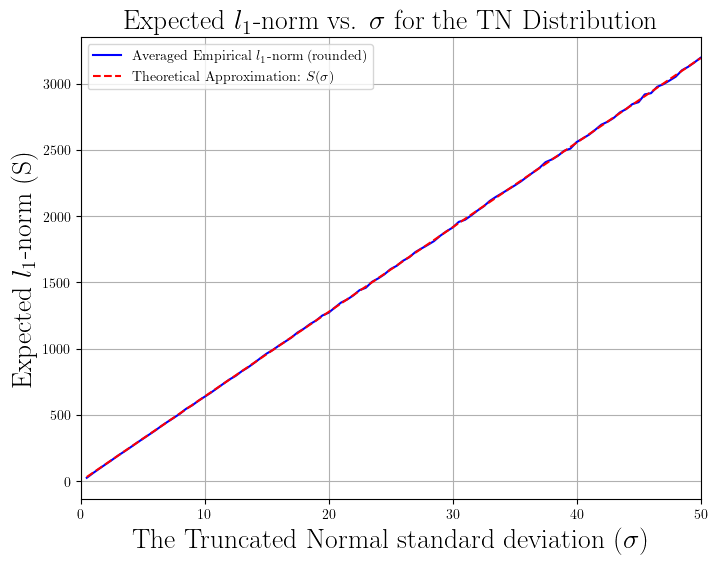

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
n = 80  # Number of variables in the vector
mu = 0  # Mean of the normal distribution
MAX_SIGMA=50.0
sigma_range = np.linspace(0.5, MAX_SIGMA, 100)  # Range of sigma values to test
num_simulations = 1000
S_approx = n * (np.sqrt(2 / np.pi)) * sigma_range
title = 'sigma-vs-S'
title += f'_N{n}'

# List to store the averaged S values
S_avg_values = []

# Simulation over a range of sigma values with averaging over multiple samples
for sigma in sigma_range:
    S_simulations = []
    for _ in range(num_simulations):
        # Generate n random variables from a normal distribution
        X = np.random.normal(mu, sigma, n)
        # Round the values to the nearest integer
        X_rounded = np.round(X)
        # Calculate the l1-norm (sum of absolute values)
        S_simulations.append(np.sum(np.abs(X_rounded)))
    
    # Calculate the average l1-norm for this sigma
    S_avg_values.append(np.mean(S_simulations))

# Plot the results with the theoretical approximation
#plt, ax = pltlib.figure(figsize=(8, 6)) #
plt.figure(figsize=(8, 6))
plt.plot(sigma_range, S_avg_values, label="Averaged Empirical $l_1$-norm (rounded)", color='blue')
plt.plot(sigma_range, S_approx, label="Theoretical Approximation: $S(\sigma)$", color='red', linestyle='--')
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.xlabel(r'The Truncated Normal standard deviation ($\sigma$)',fontsize=20)
plt.ylabel(r'Expected $l_1$-norm (S)',fontsize=20)
plt.title(r'Expected $l_1$-norm vs. $\sigma$ for the TN Distribution',fontsize=20)
plt.grid(True)
#plt.ylim(0,70)
plt.xlim(0,MAX_SIGMA)
plt.legend()
plt.savefig(title + '.svg', format='SVG')
plt.show()



## Going the right way: $S$ as the controlling step-size

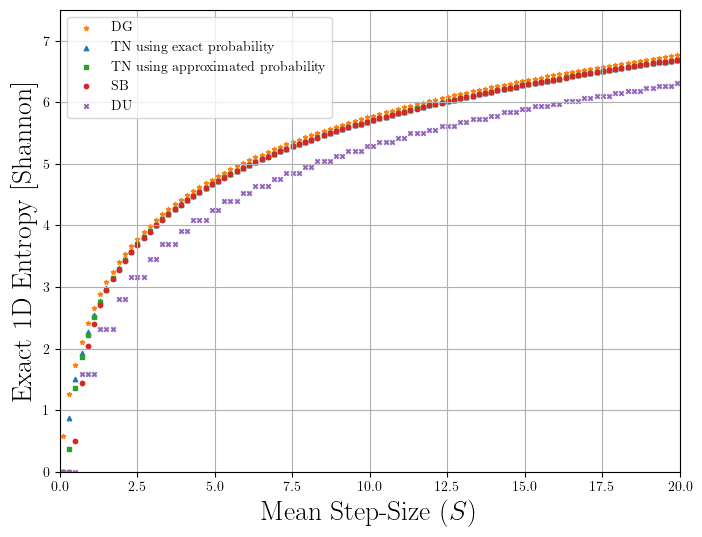

In [2]:
import numpy as np
from scipy.stats import entropy,geom,norm
import seaborn as sns
import matplotlib.pyplot as plt
import maxEntropy as ME
import binomialEntropy as BE
from scipy.optimize import fsolve
#
if __name__ == '__main__' :
    n=1
    S_values = np.linspace(0.1, 100, 500)  # From narrow to wide distributions
    sigma_values = S_values / (n * np.sqrt(2 / np.pi))
    
    # Range of p values - extracted from S_values
    p_values_from_S = [1.0 - ( sigma / (1.0+np.sqrt(1+(sigma**2))) ) for sigma in S_values]
    
    #Symmetrical Uniform Integer 
    #SUentropy_values1 = [entropy_sym_randint_from_sigma(sigma) for sigma in sigma_values]
    SUentropy_values = [ME.entropy_sym_randint_from_l1norm(S) for S in S_values]

    # Compute DG entropy for each p
    DGentropy_values_from_S = [ME.entropy_dgeometric(p) for p in p_values_from_S]
    #DGentropy_values_from_sigma = [ME.entropy_dgeometric(p) for p in p_values_from_sigma]

    # Compute TN entropy for each sigma
    TGentropy_values_exact = [ME.entropy_TGauss(sigma) for sigma in sigma_values]
    TGentropy_values_approx = [ME.entropy_TGauss(sigma,exact=False) for sigma in sigma_values]
    #
    #Compute Shifted Binomial entropy per sigma
    SBentropy_values_exact = [BE.shifted_binomial_entropy_theoretical(sigma) for sigma in sigma_values]
    #
    plt.figure(figsize=(8, 6))
    plt.scatter(S_values, DGentropy_values_from_S, label='DG',color='tab:orange', marker='*', s=10)
    #plt.scatter(sigma_values, DGentropy_values_from_sigma, label='Double-Geometric Distribution controlled by $\sigma$',marker='+')
    plt.scatter(S_values, TGentropy_values_exact, label='TN using exact probability',color='tab:blue', marker='^', s=10)
    plt.scatter(S_values, TGentropy_values_approx, label='TN using approximated probability',color='tab:green', marker='s', s=10)
    plt.scatter(S_values, SBentropy_values_exact, label='SB',color='tab:red', marker='o', s=10)
    plt.scatter(S_values, SUentropy_values, label='DU',color='tab:purple', marker='x', s=10)
    #plt.scatter(sigma_values, SUentropy_values2, label='Symmetrical Uniform Integer controlled by expected $\ell_{1}$-norm',marker='d',s=4)
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif')
    plt.xlabel(r"Mean Step-Size ($S$)",fontsize=20) # plt.xlabel(r"$\sigma$",fontsize=20)
    plt.ylabel(r"Exact 1D Entropy [Shannon]",fontsize=20)
    # plt.title('Entropy of Truncated Gaussian Distribution vs. $\\sigma$')
    plt.grid(True)
    plt.ylim(0,7.5)
    plt.xlim(0,20)
    plt.legend()
    plt.savefig("exact1Dentropy.svg",format='svg')
    plt.show()

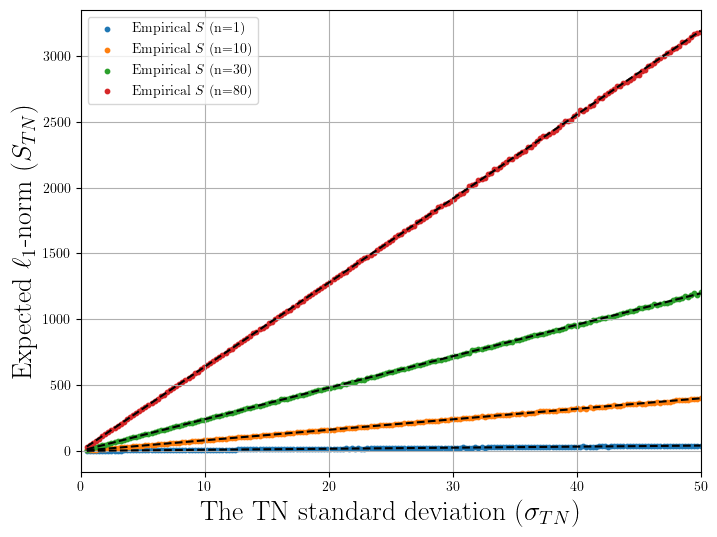

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
n_values = [1, 10, 30, 80]  # List of different dimensionality values
mu = 0  # Mean of the normal distribution
MAX_SIGMA = 50.0
sigma_range = np.linspace(0.5, MAX_SIGMA, 200)  # Range of sigma values to test
num_simulations = 1000

# Plot setup
plt.figure(figsize=(8, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']  # New set of colors

# Loop over different values of n
for idx, n in enumerate(n_values):
    # Theoretical approximation for each n
    S_approx = n * (np.sqrt(2 / np.pi)) * sigma_range
    title = f'sigma-vs-S_N{n}'

    # List to store the averaged S values
    S_avg_values = []

    # Simulation over a range of sigma values with averaging over multiple samples
    for sigma in sigma_range:
        S_simulations = []
        for _ in range(num_simulations):
            # Generate n random variables from a normal distribution
            X = np.random.normal(mu, sigma, n)
            # Round the values to the nearest integer
            X_rounded = np.round(X)
            # Calculate the l1-norm (sum of absolute values)
            S_simulations.append(np.sum(np.abs(X_rounded)))
        
        # Calculate the average l1-norm for this sigma
        S_avg_values.append(np.mean(S_simulations))

    # Plot the results with the theoretical approximation for this n
    plt.scatter(sigma_range, S_avg_values, label=f"Empirical $S$ (n={n})", marker='o', color=colors[idx],s=10)
    plt.plot(sigma_range, S_approx, linestyle='--', color='black') #label=f"Theoretical Approx (n={n})",
    # plt.scatter(c_values, nTN, label=f"TN in {n}D",marker='^', color=colors[2*idx], s=10)
    # plt.plot(c_values, L_values, color='black', linestyle='--')
    # plt.yscale('log')

# Final plot details
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.xlabel(r'The TN standard deviation ($\sigma_{TN}$)', fontsize=20)
plt.ylabel(r'Expected $\ell_1$-norm ($S_{TN}$)', fontsize=20)
# plt.title(r'Expected $l_1$-norm vs. $\sigma$ for the TN Distribution', fontsize=20)
plt.grid(True)
plt.xlim(0, MAX_SIGMA)
plt.legend()
plt.savefig('sigma_vs_S_multiple_n.svg', format='SVG')
plt.show()
